## Import Data

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test)=cifar10.load_data()

print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))


from tensorflow.keras.utils import to_categorical

# Normalizing
x_train=x_train/255
x_test=x_test/255

#One hot encoding
y_train_cat=to_categorical(y_train,10)
y_test_cat=to_categorical(y_test,10)

170498071/170498071 [==============================] - 4s 0us/step
Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)


# VGGNet


In [ ]:
# Importing the necessary libraries, which we may or may not use. Its always good idea to import them befor (if you remember) else we can do it at any point of time no problem.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, BatchNormalization, ReLU
from tensorflow.keras import Model
class VGGNet:

    vgg16_configs = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))

    def __init__(self, num_classes=10, input_shape=(32, 32, 3), configs = vgg16_configs, name='VGG16'):
        self.num_classes = num_classes
        self.input_shape = input_shape
        self.configs = configs
        self.name = name

    def _vgg_block(self, x, filters, num_convs):
        for _ in range(num_convs):
            x = Conv2D(filters=filters, kernel_size =3, padding ='same')(x)
            x = BatchNormalization()(x)
            x = ReLU()(x)
        x = MaxPool2D(pool_size=2, strides=2, padding='same')(x)
        return x

    def build(self):

        # VGGNet
        input_layer = Input(shape=self.input_shape)
        x = input_layer
        for (num_conv, filter) in self.configs:
            x = self._vgg_block(x, filters=filter, num_convs=num_conv)

        # Fully connected layers
        x = Flatten()(x)
        x = Dense(units=256, activation='relu')(x)
        x = Dense(units=256, activation='relu')(x)
        output = Dense(units=self.num_classes, activation='softmax')(x)

        # Create the model
        model = Model(inputs=input_layer, outputs=output, name=self.name)
        return model

configs = ((2, 64), (2, 128), (3, 256), (3, 512), (3, 512))
vgg16 = VGGNet(num_classes=10, input_shape=(32, 32, 3), configs=configs).build()

In [ ]:
from tensorflow.keras.optimizers import Adam
opt = Adam(
    learning_rate=0.0002,
    beta_1=0.96,
    beta_2=0.9994,
    epsilon=4e-08,
    amsgrad=False,
    name='Adam')

vgg16.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
vgg16.summary()

Model: "VGG16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (Batch  (None, 32, 32, 64)        256       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 32, 32, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        36928     
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 64)        256       
 chNormalization)                                            

In [ ]:
history1 = vgg16.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))
evaluation = vgg16.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

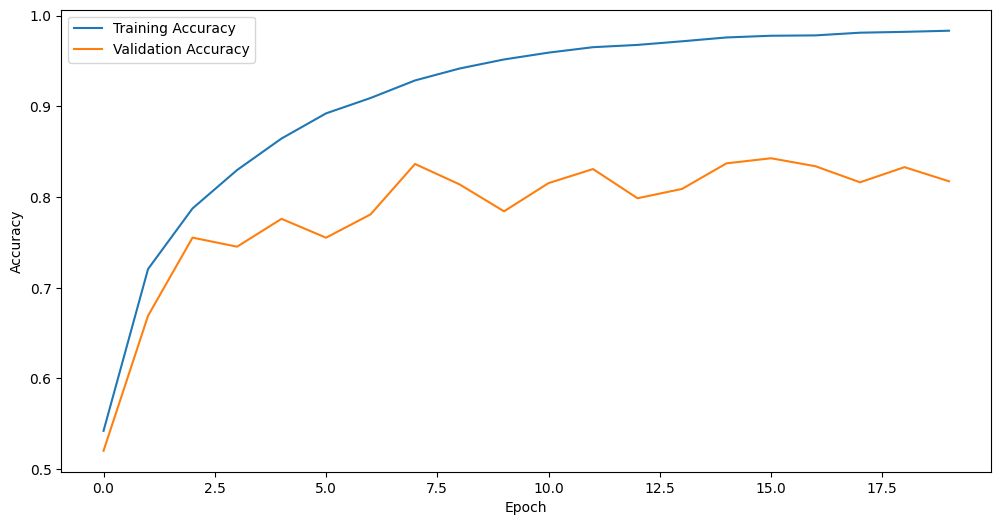

In [ ]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ accuracy và loss trong quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

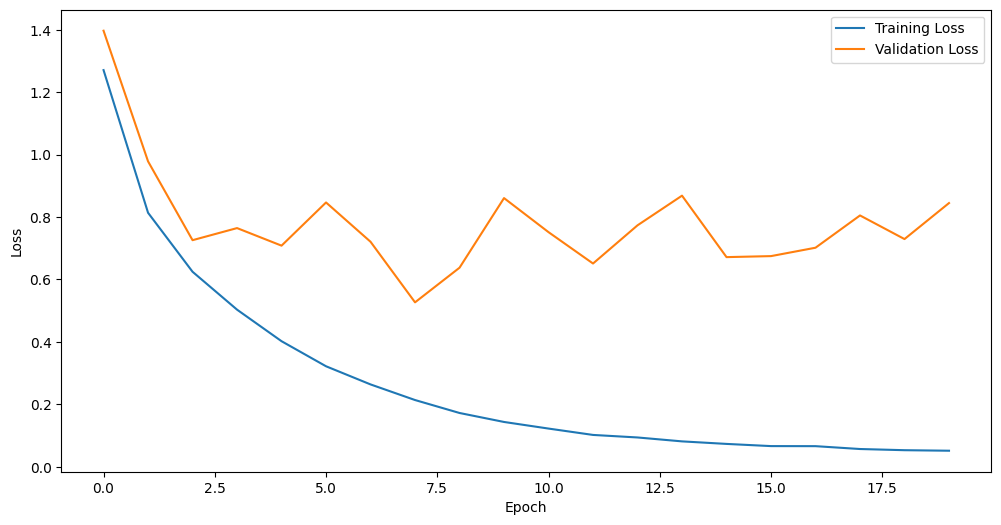

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# AlexNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

alexnet = Sequential([
  Conv2D(filters=64, kernel_size=(11,11), strides=(4,4), padding='same', activation='relu', input_shape=(32,32,3)),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(filters=192, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'),
  MaxPooling2D(pool_size=(2,2)),
  Flatten(),
  Dense(4096, activation='relu'),
  Dropout(0.5),
  Dense(4096, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

In [ ]:
alexnet.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
alexnet.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 8, 8, 64)          23296     
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 4, 4, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_43 (Conv2D)          (None, 4, 4, 192)         307392    
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 2, 2, 192)         0         
 ng2D)                                                           
                                                                 
 conv2d_44 (Conv2D)          (None, 2, 2, 384)         663936    
                                                                 
 conv2d_45 (Conv2D)          (None, 2, 2, 256)        

In [ ]:
from tensorflow.keras.optimizers import SGD
opt = tf.keras.optimizers.legacy.SGD(learning_rate=0.1)
alexnet.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history = alexnet.fit(x_train,y_train_cat,epochs=20,validation_data=(x_test,y_test_cat))
evaluation = alexnet.evaluate(x_test, y_test_cat)
print('Test Accuracy: {}'.format(evaluation[1]))

Epoch 1/20
1563/1563 [==============================] - 15s 9ms/step - loss: 2.1161 - accuracy: 0.1903 - val_loss: 1.8050 - val_accuracy: 0.3167
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6660 - accuracy: 0.3893 - val_loss: 1.4861 - val_accuracy: 0.4612
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.4370 - accuracy: 0.4849 - val_loss: 1.5232 - val_accuracy: 0.4588
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.3061 - accuracy: 0.5346 - val_loss: 1.4726 - val_accuracy: 0.4870
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1971 - accuracy: 0.5786 - val_loss: 1.2871 - val_accuracy: 0.5552
Epoch 6/20
1563/1563 [==============================] - 14s 9ms/step - loss: 1.1006 - accuracy: 0.6149 - val_loss: 1.2399 - val_accuracy: 0.5649
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.0104 - accuracy: 0.6478 - val_loss: 1.2618 - val_ac

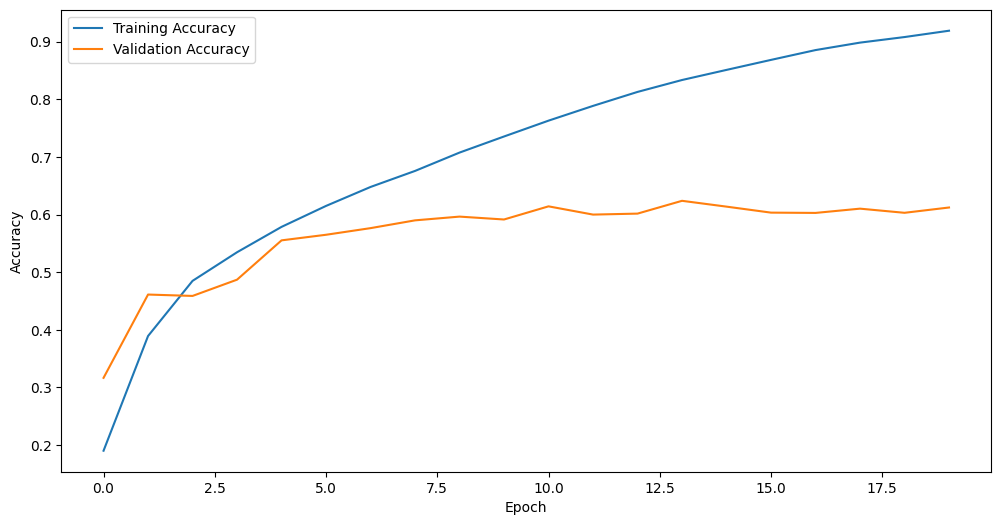

In [ ]:
import matplotlib.pyplot as plt
# Vẽ biểu đồ accuracy và loss trong quá trình huấn luyện
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

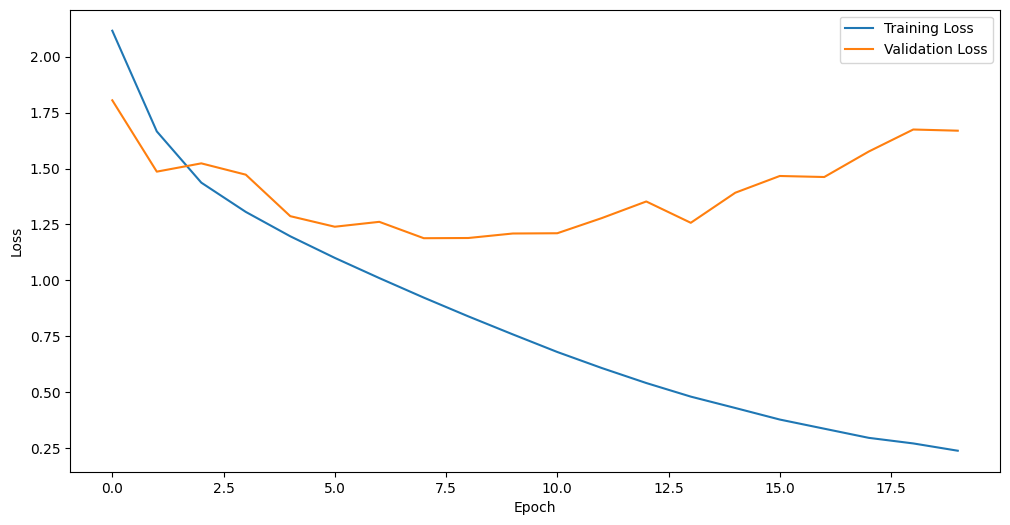

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()